In [12]:
from activ import load_data, data_normalization
import os
from activ.readfile import TrackTBIFile
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
raw = load_data()

In [6]:
nmfdata = load_data(uoinmf=True)

In [7]:
rawbm = raw.biomarkers #(247,235)
A = data_normalization.data_normalization(raw.outcomes, 'positive') #(247,177)

In [8]:
w = nmfdata.outcomes #(247,6)
h = nmfdata.outcome_bases #(6,177)

In [9]:
def drop_x_percent(A,w,h,percent):
    total_features = h.shape[1]
    num_features_to_drop = np.round(total_features*percent//100)
    h_sum = np.sum(h, axis=0)
    h_sum_sorted = np.argsort(h_sum)
    indices_lowest_values = h_sum_sorted[:num_features_to_drop]
    h_new = np.delete(h, indices_lowest_values, axis=1)
    A_new = np.delete(A, indices_lowest_values, axis=1)    
    return A_new

In [10]:
percent = [0, 10,20,30,40,50]
for p in percent:
    A_features_dropped = drop_x_percent(A,w,h,p)
    print(A_features_dropped.shape)

(247, 177)
(247, 160)
(247, 142)
(247, 124)
(247, 107)
(247, 89)


In [7]:
percent = [0, 10,20,30,40,50]
for p in percent:
    A_features_dropped = drop_x_percent(A,w,h,p)
    fname = '/Users/ahyeon/Desktop/activ/activ/data_features_dropped_{}.h5'.format(p)
    print(fname)
    TrackTBIFile.write(fname, rawbm, A_features_dropped)
    print('here')

/Users/ahyeon/Desktop/activ/activ/data_features_dropped_0.h5
here
/Users/ahyeon/Desktop/activ/activ/data_features_dropped_10.h5
here
/Users/ahyeon/Desktop/activ/activ/data_features_dropped_20.h5
here
/Users/ahyeon/Desktop/activ/activ/data_features_dropped_30.h5
here
/Users/ahyeon/Desktop/activ/activ/data_features_dropped_40.h5
here
/Users/ahyeon/Desktop/activ/activ/data_features_dropped_50.h5
here


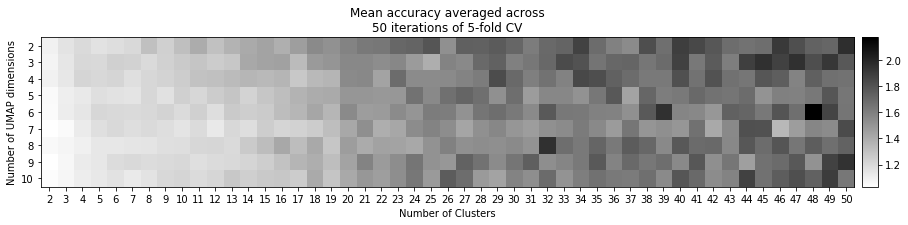

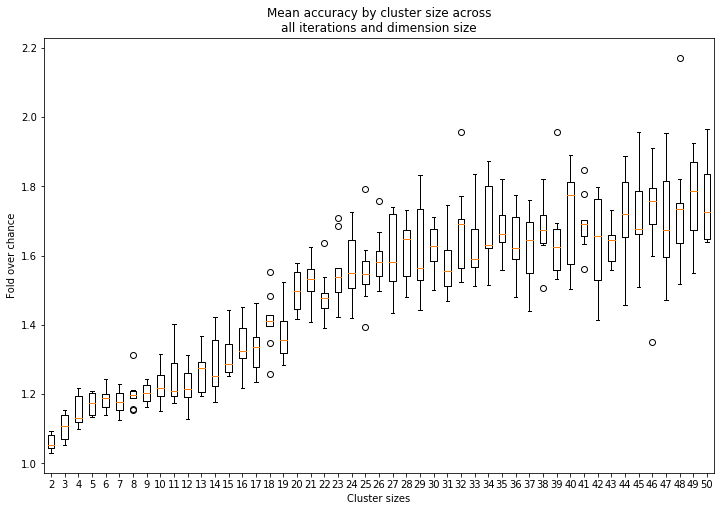

In [14]:
file = '/Users/ahyeon/Desktop/activ/results/mahalanobis_output/umap_cluster_uoinmf-mahalanobis.h5'
f = h5py.File(file, 'r')
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
score.shape
results = UmapClusteringResults(file)
plt.figure(figsize=(15, 5))
ret = results.make_heatmap()
plt.figure(figsize=(12,8))
plt.title("Mean accuracy by cluster size across\nall iterations and dimension size")
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")
ret = plt.boxplot(results.adjust(), labels=results.cluster_sizes)


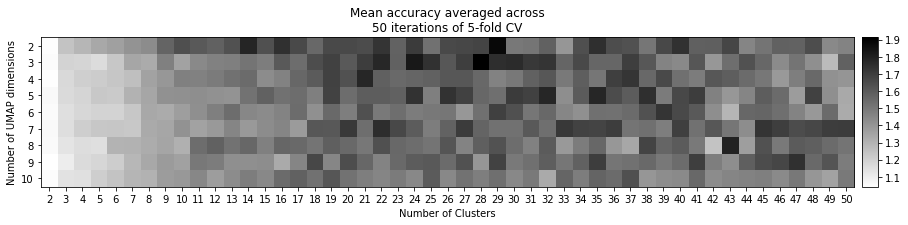

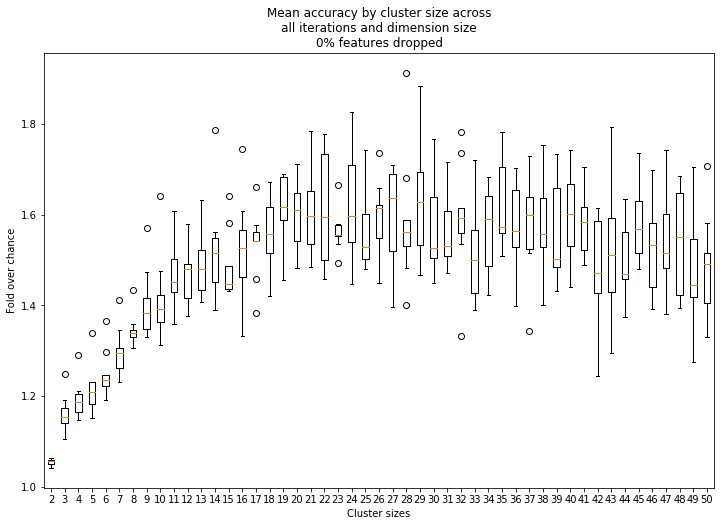

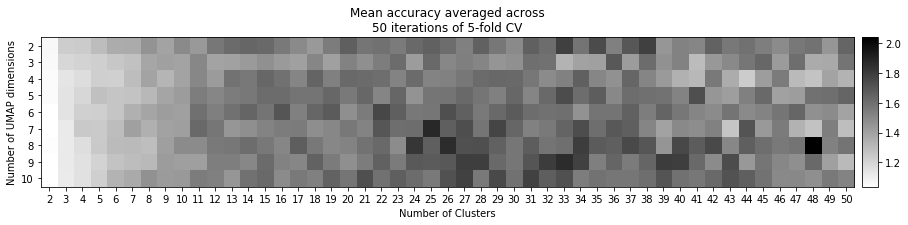

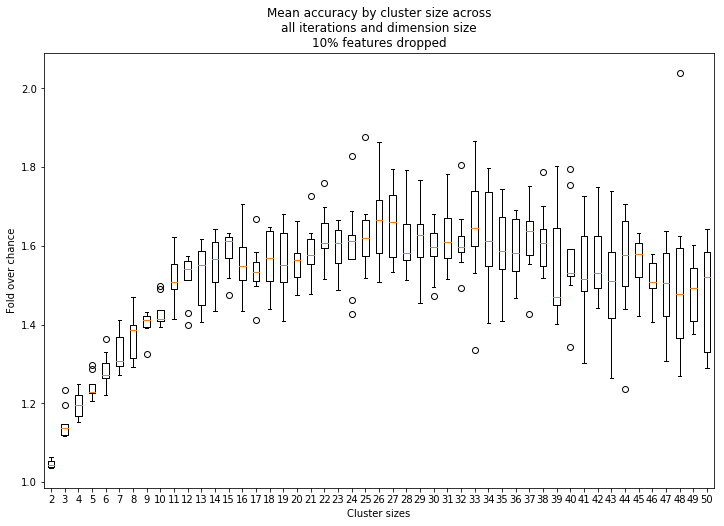

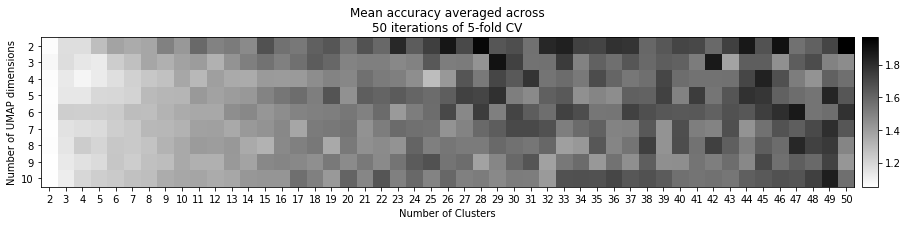

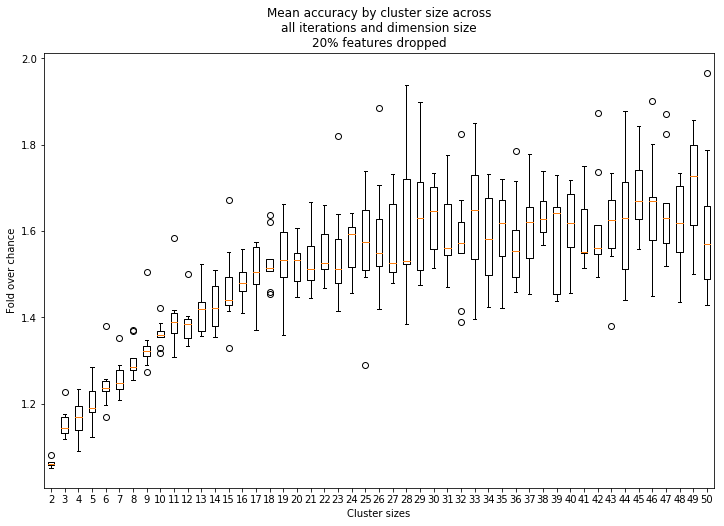

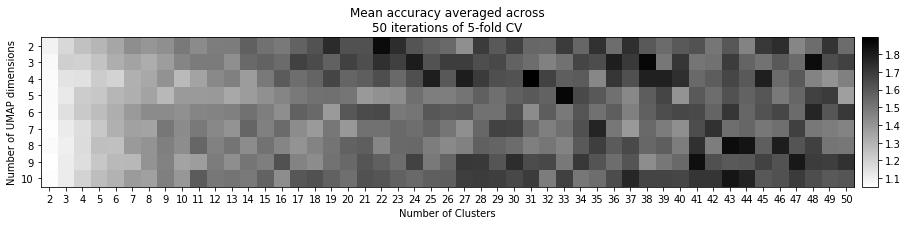

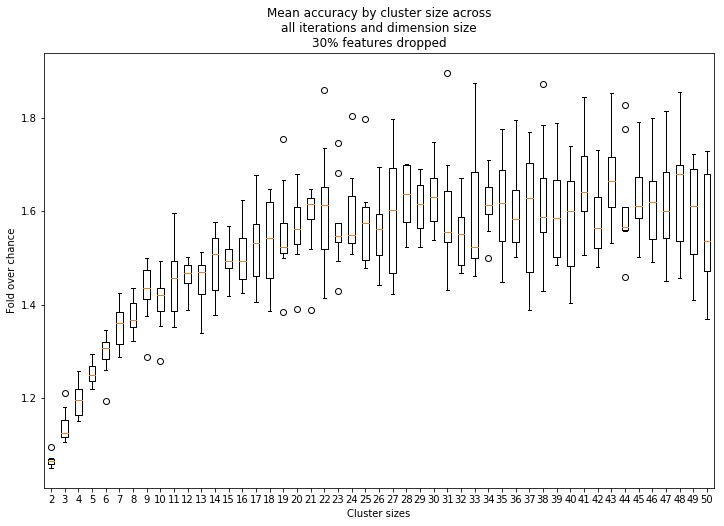

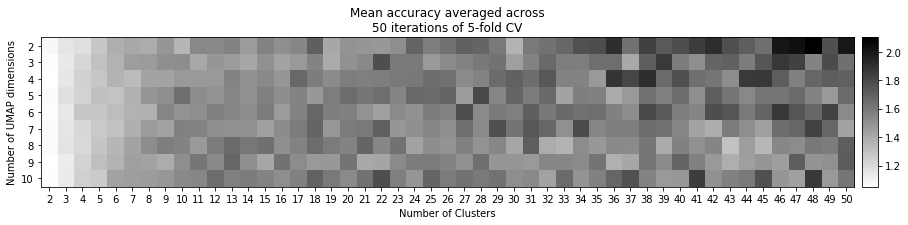

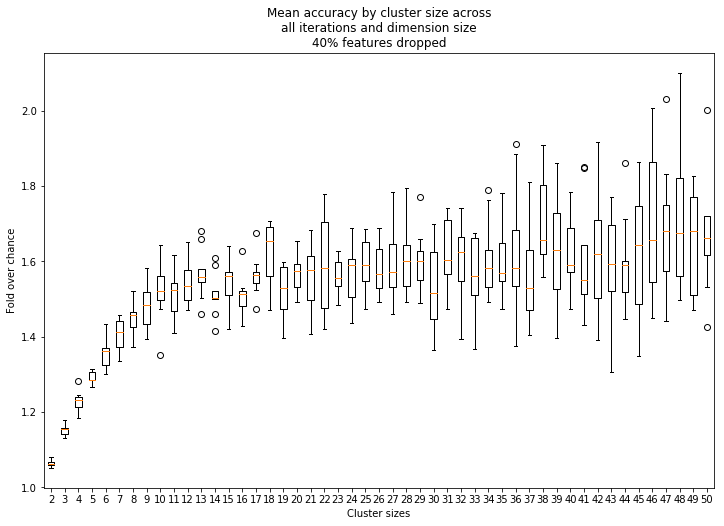

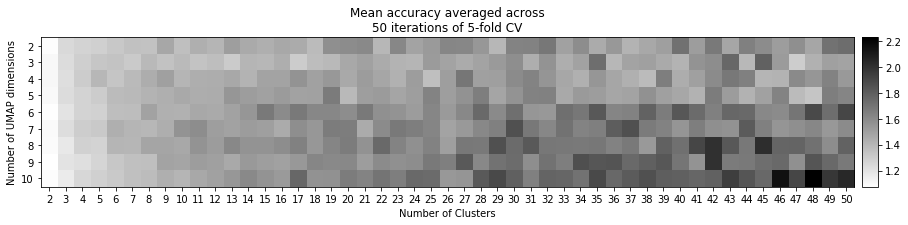

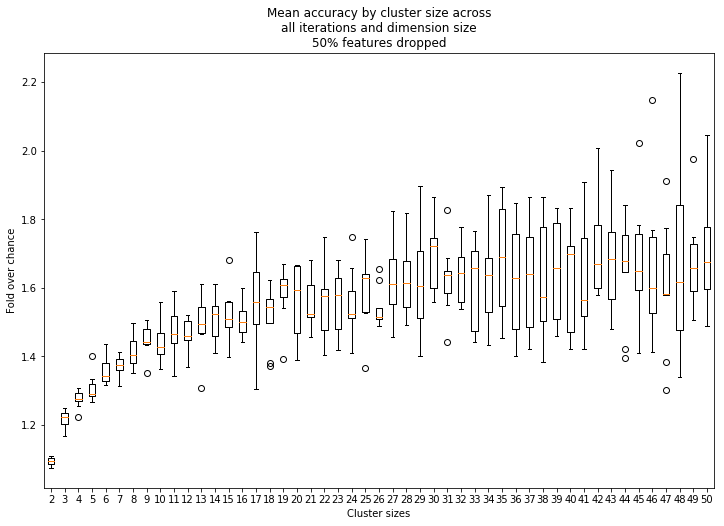

In [20]:
pdf = PdfPages('/Users/ahyeon/Desktop/activ/results/features_dropped/features_dropped_analysis.pdf')
for p in percent:
    path = '/Users/ahyeon/Desktop/files/umap_cluster_features_{}.h5'.format(p)
    results = UmapClusteringResults(path)
    plt.figure(figsize=(15, 5))
    ret = results.make_heatmap()
    pdf.savefig()
    plt.figure(figsize=(12,8))
    plt.title("Mean accuracy by cluster size across\nall iterations and dimension size\n{}% features dropped".format(p))
    plt.xlabel("Cluster sizes")
    plt.ylabel("Fold over chance")
    ret = plt.boxplot(results.adjust(), labels=results.cluster_sizes)
    pdf.savefig()
pdf.close()